# Vignette of plotting hapROH output
In this vignette you will learn how to plot 

In [2]:
import os as os
import pandas as pd
import sys

### Turn off Font not found warnings
import logging
logging.getLogger('matplotlib.font_manager').setLevel(logging.ERROR)

### Make white Background in Jupyter Notebooks (for dark mode)
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}

## 0) Set the path
You can set the path here to the path you want to work in (relative data loads will be done from there)

In [2]:
### Fill in your own path here!
os.chdir("/mnt/archgen/users/hringbauer/git/hapROH/Notebooks/Vignettes/")

### If you want to use functions other than the default HAPSBURG Instatllation
#sys.path.insert(0, )
#sys.path.insert(0, "/mnt/archgen/users/yilei/tools/hapROH/package") 

# 1) Various Plotting functions
General rule: savepath="PATH/FILE.pdf" controls where the resulting figure is saved to. If an empty string is given, the file will not be saved.
You can change the extension .pdf and .png, which will automatically use the according figure format. E.g. "./figure/fig.pdf" will save the figure as .pdf

### Plot the Posterior along one Chromosome. 
Needs the posterior to be saved,
(so in hapsb_ind use delete=False to keep it)

Set folder to the chromosome output you want to plot

In [3]:
from hapsburg.figures.plot_posterior import plot_posterior_cm

### Plot Posterior from Standard hapROH output 
This plots the output when run from pseudo-haploid eigenstrat files.

Here, it uses the output from the example in the Vignette `./callROH_vignette.ipynb'

Successfully loaded Data from: ./ExampleOutput/I1178/chr3/


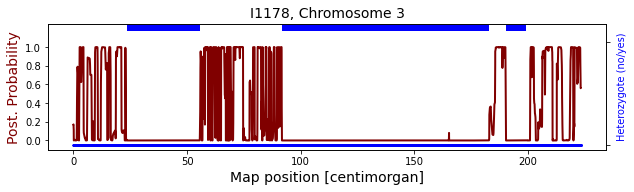

In [4]:
plot_posterior_cm(folder = "./ExampleOutput/I1178/chr3/", savepath="", 
                  empirical=True, m=1, cm_lim=[], groundtruth = False, min_cm=1,
                  readcount=False, figsize=(10,4), title="I1178, Chromosome 3")

### Zoom into particular region of chromosome
We now change the cm_lim parameter, which allows use to zoom in. It is a list of length two, and defines the region (in cM coordinates) to plot.

Successfully loaded Data from: ./ExampleOutput/I1178/chr3/


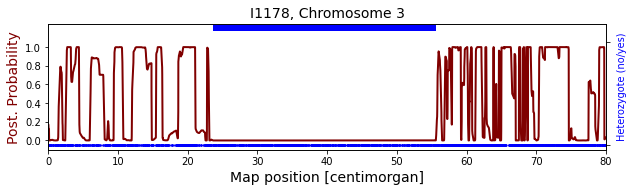

In [7]:
plot_posterior_cm(folder = "./ExampleOutput/I1178/chr3/", savepath="", 
                  empirical=True, m=1, cm_lim=[0,80], groundtruth = False, min_cm=1,
                  readcount=False, figsize=(10,4), title="I1178, Chromosome 3")

### Expert Version: Visualize also "mismatching" reads
One can also plot output when hapROH was run on read count data - that allows one to visualize SNPs where one has at least >=m reads for ref and alt allele - indicating heteroygosity. ROH should be lacking those! Depending on your target coverage, you will have to adjust the parameter 'm' (e.g. m=1 for low coverage). 

To produce such hapROH runs from .bam files, check e.g. `./ROH_contam_tutorial.ipynb` - it is an advanced concept not needed for the base function of `hapROH`.

Successfully loaded Data from: /mnt/archgen/users/yilei/Data/AGDP/contamX/I4432/hapRoh/I4432/chr6/


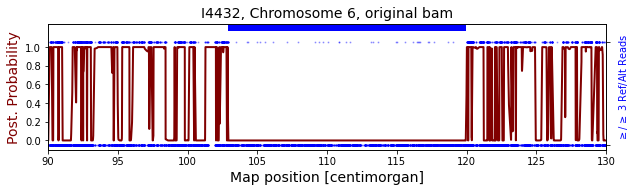

In [10]:
plot_posterior_cm(folder = "/mnt/archgen/users/yilei/Data/AGDP/contamX/I4432/hapRoh/I4432/chr6/", 
                  savepath="", empirical=True, m=3, cm_lim=[90, 130], groundtruth = False, min_cm=1,
                  readcount=True, figsize=(10,4), title="I4432, Chromosome 6, original bam")

### Plot Karyotype Plot with ROH
Plot inferred ROH on all chromosomes

In [11]:
from hapsburg.figures.plot_individual_roh import plot_roh_individual

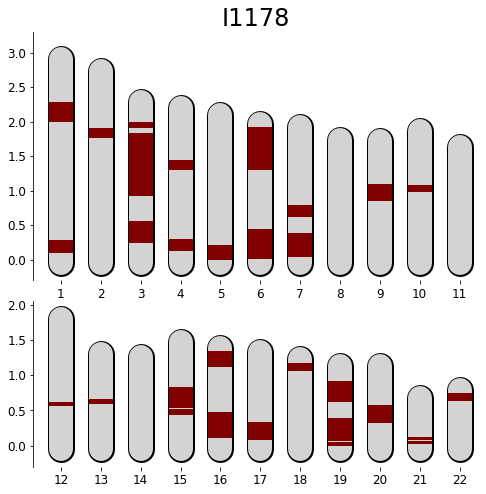

In [12]:
plot_roh_individual(iid="I1178", folder="./ExampleOutput/", 
                    prefix_out="", min_cm=4, plot_bad=False, savepath="")  

### Wow, lots of ROH
That was the individuals with the most ROH in the sample

### Do Histogram of the Length Distribution and theoretical expectations

In [13]:
from hapsburg.figures.plot_individual_roh import plot_pde_individual

Loaded ROH of 1 individuals. Plotting their sum...


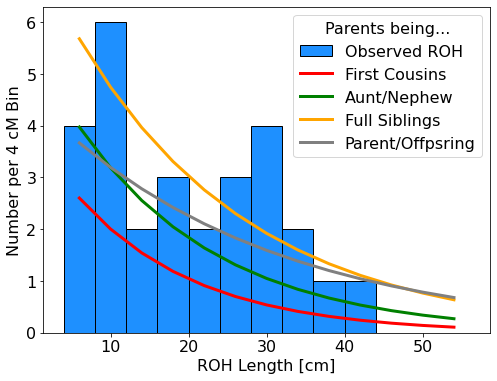

In [14]:
plot_pde_individual(iid=["I1178"], min_cm=3, bw_cm=4, 
                    kde_plot=False, plotlim=[4, 60], prefix_out="",
                    savepath="", folder="./ExampleOutput/")

### Plot the Lenght Distribution of ROH of multiple Individuals
If you pass on the iids as a list, it will load ROH of all of them and plot the joint histogram.
Expectations are rescaled accordingly. This is useful if you want to group several individuals with a similar profile and get a "average" curve with less noise.

Loaded ROH of 2 individuals. Plotting their sum...


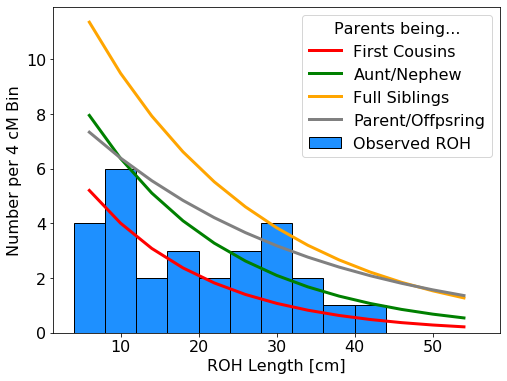

In [20]:
plot_pde_individual(iid=["I1178", "I0644"], min_cm=3, bw_cm=4, 
                    kde_plot=False, plotlim=[4, 60], prefix_out="",
                    savepath="", folder="./ExampleOutput/")

## 1.1) Plot summary over multiple Individuals

First plot only expectations, for instance as a legend.
You could choose which expectations in the method parameters

In [15]:
from hapsburg.figures.plot_bars import plot_legend_only, plot_panel_row, prepare_dfs_plot

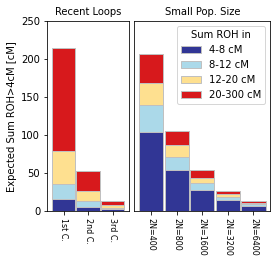

In [16]:
plot_legend_only(savepath="", figsize=(4,3.5))

### Now plot an empirical dataset. 
prepare_dfs_plot prepared from the combined csv (splitting it up into a list of pandas dataframes, these dataframes will be plot in groups - you could also manually produce these lists)

plot_panel_row then plots these data frames  

In this simple usecase, the two individuals analyzed above (from two different populations) are plotted, together with a legend to the right.

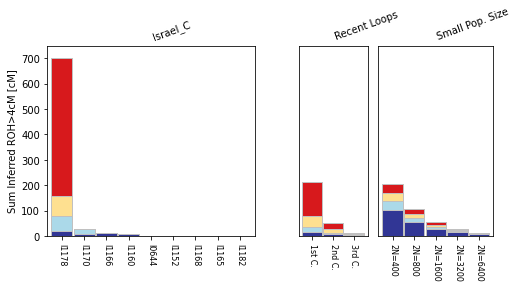

In [17]:
df1 = pd.read_csv("./ExampleOutput/combined_roh05.csv", sep='\t')
plot_dfs, cols = prepare_dfs_plot(df1, cms=[4, 8, 12, 20])

# ./figures_test/freilich20_bars.pdf
plot_panel_row(plot_dfs, wspace=0.1, r_title=20, leg_pos=-2, 
               ylim=[0,750], figsize=(8,3.5), savepath="")

Looks like we detected one highly inbred individual!

# Advanced Plotting: Using a map and fitting of ROH over time
Warning: requires basemap package, which can be tricky to install. Also needs resutls file with additional meta data (.csv) with latitude, longitude and age for each sample.
The big datatable in the vignette folder is one such example, which you can use to explore, or as a template for visualizing your own results.
You can also use a color column in that meta file - this determines in which color each individuals is plot

In [20]:
import pandas as pd
from hapsburg.figures.plot_timelines import plot_map_time, extract_pop, prep_label

### Example using the global results .csv 
[global results will be released with publication]
For detailled explanation of all the possible parameters check the doc string of the method.
(they have reasonable default values, but I show them here so you get a sense what can be done in principle).

You can change what map is plotted by updating the corners in the parameter crs_m (in the form [lat0, lat1, lon0, lon1]). You probably have to play around with the with_ratios then to get nicely matching squares.

If you set std_band to 0 the GP fitting is not plotted - that might be useful when you have few individuals. Otherwise lght_s sets the lower and upper bound of the "covariance" kernels (bigger values: points affect more distant times)

Initial: 1**2 * RBF(length_scale=1e+03) + WhiteKernel(noise_level=2)
Optimum: 2.2**2 * RBF(length_scale=1.5e+03) + WhiteKernel(noise_level=2.29)
Log-Marginal-Likelihood: -285.38673782259656


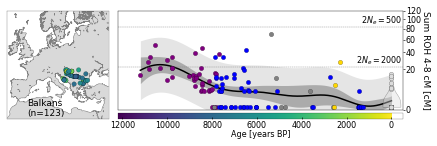

In [21]:
pop = "Balkans"
df1 = pd.read_csv("./ExampleData/roh_all_inds_final_v42.csv", sep="\t")
### Now we subset to all individuals having the "region" column defined above. There is a function for that,
# but feel free to use and subsetting to individuals (i.e. rows) you prefer/need
df_t = extract_pop(df1, age_range=[0,12200], pop=pop) # Subsetting to dataframe to plot
label = prep_label(df_t, pop) # pop: What to plot in legend. Automatically produces label. You can also just write it.

plot_map_time(df_t, figsize=(7.2 , 2.0), crs_m=[28, 63, -11, 38], 
              width_ratios=(8, 20), height_ratios=[15, 1], hspace=0.06, wspace=0.015,
              s_tl=20, ec="k", lw=0.18, x_lim_tl=[-500, 12200], vrange_m=[0,12200], 
              y_lim_tl=[0,120], fsl=8, fs=9, fs_leg=9, leg_loc_tl="", title_tl="",
              map_title=label, title_loc=(0.2,0.01), cm=4, cm1=8, frac=0, std_band=1.92, 
              lgth_s=[1500,1500], bottomrow=True, rightcol=True, lw_fit=1.5, 
              ticks=[83.82, 21.84], tick_l=[f"$2N_e=500$", f"$2N_e=2000$"], 
              width_t=0.6, length_t=2, lbl_pad_time=10, lbl_pad_age=0, xl_pad=1.5, yl_pad=1, 
              widths=800, alpha_vio=0.4, savepath="")